In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import networkx as nx
import matplotlib.pyplot as plt

import os
# import pandas_profiling
datapath = 'C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\dataset_2022'

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [3]:
datafile = '2021.11_WAVES-ACCESS-RECORDS.csv'
data=pd.read_csv(os.path.join(datapath, datafile))
print(data.shape)
data.head(3)

(4608, 27)


,NAMELAST,NAMEFIRST,NAMEMID,UIN,BDGNBR,ACCESS_TYPE,TOA,POA,TOD,POD,...,LASTENTRYDATE,TERMINAL_SUFFIX,VISITEE_NAMELAST,VISITEE_NAMEFIRST,MEETING_LOC,MEETING_ROOM,CALLER_NAME_LAST,CALLER_NAME_FIRST,CALLER_ROOM,RELEASEDATE
0,COLLINS,JOSHUA,A,HDG6DO,NaN,VA,11/2/2021 14:03,VP005,NaN,NaN,...,6/23/2021 17:47,GL,REED,LEVI,VPR,RESIDENCE,GOODHUE,KEVIN,NaN,3/11/2022
1,COLLINS,JOSHUA,A,HDG6DO,NaN,VA,11/16/2021 11:21,VP005,NaN,NaN,...,6/23/2021 17:47,GL,REED,LEVI,VPR,RESIDENCE,GOODHUE,KEVIN,NaN,3/11/2022
2,COLLINS,JOSHUA,A,HDG6DO,NaN,VA,11/17/2021 10:29,VP005,NaN,NaN,...,6/23/2021 17:47,GL,REED,LEVI,VPR,RESIDENCE,GOODHUE,KEVIN,NaN,3/11/2022


In [13]:
selected_columns = ['NAMELAST','NAMEFIRST', 'UIN','NAMEMID', 'CALLER_NAME_LAST', 'CALLER_NAME_FIRST']
subset = data[selected_columns]
subset['CALLER_NAME'] = subset[['CALLER_NAME_LAST', 'CALLER_NAME_FIRST']].agg(' '.join, axis=1)
subset.sample(3)

C:\Users\luoyan011\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NAMELAST,NAMEFIRST,UIN,NAMEMID,CALLER_NAME_LAST,CALLER_NAME_FIRST,CALLER_NAME
1872,DAVIS,CHRISTOPHER,U34990,E,BUTLER,NICOLE,BUTLER NICOLE
1100,MARTINEAU,NICOLE,U34731,A,QURESHI,HOOR,QURESHI HOOR
398,BRANDT,EMILY,U34484,R,GINGRICH,MARY,GINGRICH MARY


In [21]:
subset.UIN.value_counts().sample(3)

U35560    4
U34341    1
U35323    1
Name: UIN, dtype: int64

In [23]:
data[data.UIN=='U35560']

,NAMELAST,NAMEFIRST,NAMEMID,UIN,BDGNBR,ACCESS_TYPE,TOA,POA,TOD,POD,...,LASTENTRYDATE,TERMINAL_SUFFIX,VISITEE_NAMELAST,VISITEE_NAMEFIRST,MEETING_LOC,MEETING_ROOM,CALLER_NAME_LAST,CALLER_NAME_FIRST,CALLER_ROOM,RELEASEDATE
3590,CASILLAS,CARMEN,N,U35560,182978.0,VA,11/19/21 13:53,NaN,NaN,NaN,...,11/19/21 10:13,TI,Murray,Tara,WH,Rose Garde,ISEN,THOMAS,NaN,3/11/2022
3661,GUZMAN,CORTEZ,C,U35560,179535.0,VA,11/19/21 13:54,NaN,NaN,NaN,...,11/19/21 10:13,TI,Murray,Tara,WH,Rose Garde,ISEN,THOMAS,NaN,3/11/2022
3662,GUZMAN,CRUZ,C,U35560,178325.0,VA,11/19/21 13:54,NaN,NaN,NaN,...,11/19/21 10:13,TI,Murray,Tara,WH,Rose Garde,ISEN,THOMAS,NaN,3/11/2022
3663,GUZMAN,JAVIER,R,U35560,185882.0,VA,11/19/21 13:47,NaN,NaN,NaN,...,11/19/21 10:13,TI,Murray,Tara,WH,Rose Garde,ISEN,THOMAS,NaN,3/11/2022


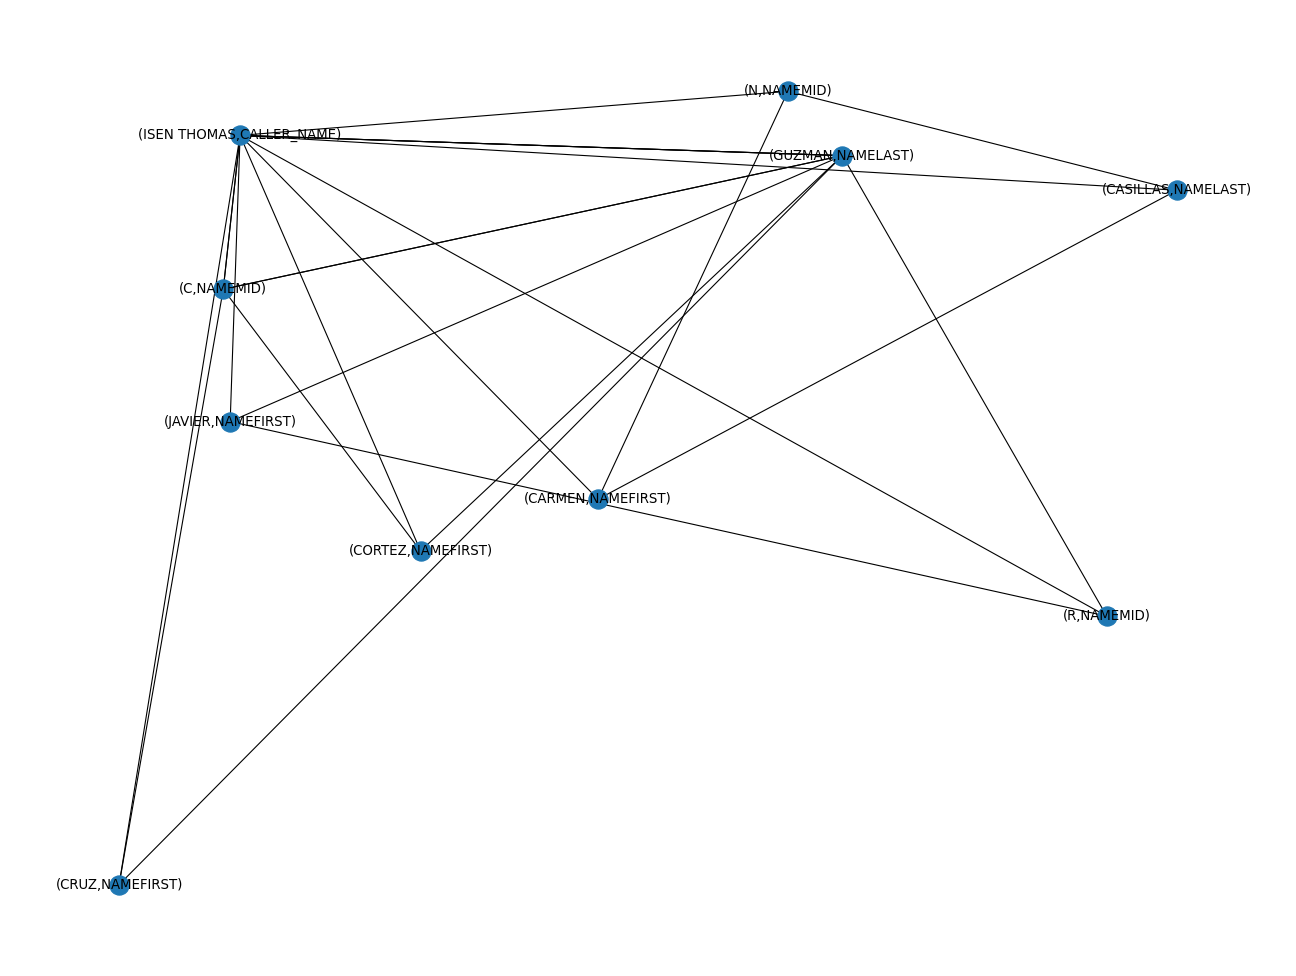

In [24]:
def get_G(data, edge_nodes):
    edge_list = []
    for edge in edge_nodes:
        edge_list += list(zip(data[edge[0]], data[edge[1]]))
    return(edge_list)
def create_multi_graph(data, node_list):
    BG = nx.MultiGraph()
    for nodes in node_list:
        node1 = list(data[nodes[0]].unique())
        node2 = list(data[nodes[1]].unique())

        BG.add_nodes_from(node1, bipartite=0, _type=nodes[0])
        BG.add_nodes_from(node2, bipartite=1, _type=nodes[1])

        edges = get_G(data, [nodes])
        BG.add_edges_from(edges)
    
    labels = dict((n, "(" + n + "," + d['_type'] + ")") for n,d in BG.nodes(data=True))


    plt.figure(figsize=(16, 12), dpi=80)
    edges = BG.edges()
#     nx.draw(BG, pos=nx.circular_layout(BG), labels=labels)
#     nx.draw(BG, pos=nx.shell_layout(BG), labels=labels)
    nx.draw(BG, pos=nx.random_layout(BG), labels=labels)
#     nx.draw(BG, pos=nx.draw_planar(BG), labels=labels)
    return(BG)

customized_edges = [['NAMELAST','NAMEFIRST'], ['NAMELAST', 'CALLER_NAME'], ['NAMELAST','NAMEMID'], 
                    ['NAMEFIRST','CALLER_NAME'], ['NAMEFIRST','NAMEMID'], ['CALLER_NAME','NAMEMID']]
create_multi_graph(subset[subset.UIN=='U35560'], customized_edges)